# Speech Recognition with Jasper

This notebook uses [Jasper](https://arxiv.org/abs/1904.03288) from the open source project [NVIDIA/OpenSeq2Seq](https://github.com/NVIDIA/OpenSeq2Seq.git) to transcribe a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).

## Install NVIDIA/OpenSeq2Seq

In [ ]:
%tensorflow_version 1.x

import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/NVIDIA/OpenSeq2Seq.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q --depth 1 {git_repo_url}
  !git checkout e958b7d
  !pip uninstall -y -q pymc3
  !pip install --upgrade joblib
  #!cd {project_name} && pip install -q -r requirements.txt
  !pip install -q youtube-dl librosa python_speech_features sentencepiece
  !pip install -q --upgrade gdown
  
  # create eval config
  !cp {project_name}/example_configs/speech2text/jasper10x5_LibriSpeech_nvgrad.py {project_name}/conf.py
  !sed -i -e 's/\/data\/librispeech\/librivox-test-clean/test/' {project_name}/conf.py
  #!sed -i -e 's/# "use_lang/"use_lang/' {project_name}/conf.py
  !echo 'backend = "librosa"' >> {project_name}/conf.py 
  #!cat {project_name}/conf.py
  !echo "wav_filename, wav_filesize, transcript" > {project_name}/test.csv
  !echo "test.wav, UNUSED, UNUSED" >> {project_name}/test.csv
  
import sys
sys.path.append(project_name)
from IPython.display import YouTubeVideo

## Download pre-trained Model

In [ ]:
if not exists(join(project_name, 'w2l_log_folder')):
  import gdown
  gdown.download('https://drive.google.com/uc?id=1gzGT8HoVNKY1i5HNQTKaSoCu7JHV4siR', 'jasper_10x5_dr_sp_nvgrad.zip', quiet=False)
  !unzip jasper_10x5_dr_sp_nvgrad.zip
  !mv checkpoint {project_name}/jasper_log_folder

## Transcribe Youtube Video

We are going to make speech recognition on the following youtube video:

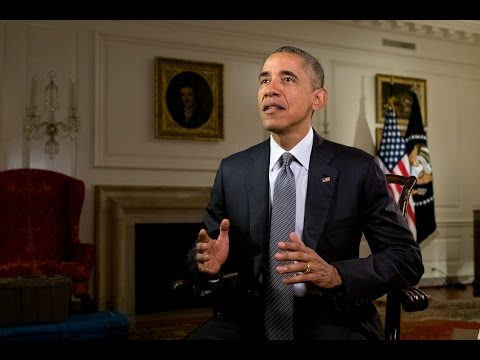

In [3]:
YOUTUBE_ID = '2AFpAATHXtc'


YouTubeVideo(YOUTUBE_ID)

Download the above video, convert to a WAV file and do speech recognition:


In [ ]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "downloaded.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!ffmpeg -loglevel panic -y -i downloaded.wav -acodec pcm_s16le -ac 1 -ar 16000 {project_name}/test.wav
!cd {project_name} && python run.py --config_file conf.py --mode=infer --infer_output_file=output.txt --use_horovod=False --num_gpus=1 --batch_size_per_gpu 1

Print out the speech detection result:

In [5]:
!tail -n1 {project_name}/output.txt

test.wav, ho everybody in our house everybody knows that president is only the third most important job in the family so this we can a man to take a low extra time to say thank you to michel for the remarkable way she does the most important jub being amun and we'r to give extra thanks to my mother in law for the romile she's always been to michele and the countless selfless ways in which she's helped michell and me raise mollian sasha i am incredibly what to have these wonderful women help me raise love and look after our girls i hope you'll also take a moment to say thank you to the women in your life who love you in that special way mons do biological mobs the doctive moms and foster mots single moss grandmas godmothers aunts mentors whomever you think of when you think of mother's day or take a moment like i will to remember the mobs who raised us his big hearts sustained us and whom we miss every day no matter how old we get giving flowers is always a good idea but i hope that on 